In [511]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)


Exploratory Data Analysis

explanation about eda

In [291]:
train = pd.read_csv('~/Documents/AmesHousingML/Machine Learning Project Proposal/Ames_HousePrice.csv') 

In [301]:
train.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
0  909176150        856     126000          30       RL          NaN     7890   
1  905476230       1049     139500         120       RL         42.0     4235   
2  911128020       1001     124900          30  C (all)         60.0     6060   
3  535377150       1039     114000          70       RL         80.0     8146   
4  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
1   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
0       0      3   2010      WD          Normal  
1       0      2   2009      WD          Normal  
2       0     11   2007      WD          Normal  
3       0      5   2009      WD          Normal  
4       0     11   2009      WD          Normal  

[5 rows x 81 columns]

In [299]:
#train.drop(columns="Unnamed: 0",inplace=True)

In [424]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [304]:
train.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.580000e+03  2580.000000    2580.000000  2580.000000  2118.000000   
mean   7.148300e+08  1486.039922  178059.623256    57.691860    68.516053   
std    1.886626e+08   488.650181   75031.089374    42.802105    22.835831   
min    5.263011e+08   334.000000   12789.000000    20.000000    21.000000   
25%    5.313630e+08  1112.000000  129975.000000    20.000000    57.000000   
50%    5.354546e+08  1436.000000  159900.000000    50.000000    68.000000   
75%    9.071811e+08  1733.000000  209625.000000    70.000000    80.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    10120.153488     6.046124     5.618605  1970.313953   1983.751938   
std      8126.937892     1.367590     1.122008    29.719705     20.490242   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7406.750000     5.000000     5.000000  1953.000000   1965.000000   
50%      9391.000000     6.000000     5.000000  1972.000000   1992.000000   
75%     11494.000000     7.000000     6.000000  1999.000000   2003.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

       ...   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  ...  2579.000000  2580.000000  2580.000000    2580.000000  2580.000000   
mean   ...   466.842575    95.919767    46.085271      23.214341     2.511240   
std    ...   207.476842   129.052016    66.060664      64.107825    25.293935   
min    ...     0.000000     0.000000     0.000000       0.000000     0.000000   
25%    ...   318.000000     0.000000     0.000000       0.000000     0.000000   
50%    ...   474.000000     0.000000    25.500000       0.000000     0.000000   
75%    ...   576.000000   168.000000    68.000000       0.000000     0.000000   
max    ...  1488.000000  1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  2580.000000  2580.000000   2580.000000  2580.000000  2580.000000  
mean     16.200388     1.662016     48.731395     6.150775  2007.838372  
std      56.824783    30.339396    498.725058     2.670647     1.312333  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  15500.000000    12.000000  2010.000000  

[8 rows x 38 columns]

# Data Preprocessing and Cleaning

In [305]:
train.shape

(2580, 81)

In [343]:
train = train.drop_duplicates()

In [306]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

For no particular reason, I'll start data cleaning with garage and its following columns to remove nan for a more complete dataframe.

In [307]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [308]:
train['GarageType'].fillna('NoGarage', inplace=True)

In [309]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', 'NoGarage', '2Types',
       'CarPort'], dtype=object)

In [310]:
train[train.GarageYrBlt.isna()].GarageType.unique()

array(['NoGarage', 'Detchd'], dtype=object)

In [311]:
train['GarageYrBlt'].fillna(0, inplace=True)

In [312]:
train['GarageType'].fillna(0, inplace=True)

In [313]:
train['GarageFinish'].fillna('NoGarage', inplace=True)

In [314]:
train['GarageQual'].fillna('NoGarage', inplace=True)

In [315]:
train['GarageCond'].fillna('NoGarage', inplace=True)

In [316]:
train['Alley'].fillna('NoAlley', inplace=True)

In [317]:
train.Neighborhood.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

In [318]:
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'CollgCr'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Somerst'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Gilbert'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'BrDale'").median())

LotFrontage    70.0
dtype: float64
LotFrontage    72.0
dtype: float64
LotFrontage    63.0
dtype: float64
LotFrontage    21.0
dtype: float64


/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/1183879512.py:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/1183879512.py:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/1183879512.py:3: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Sel

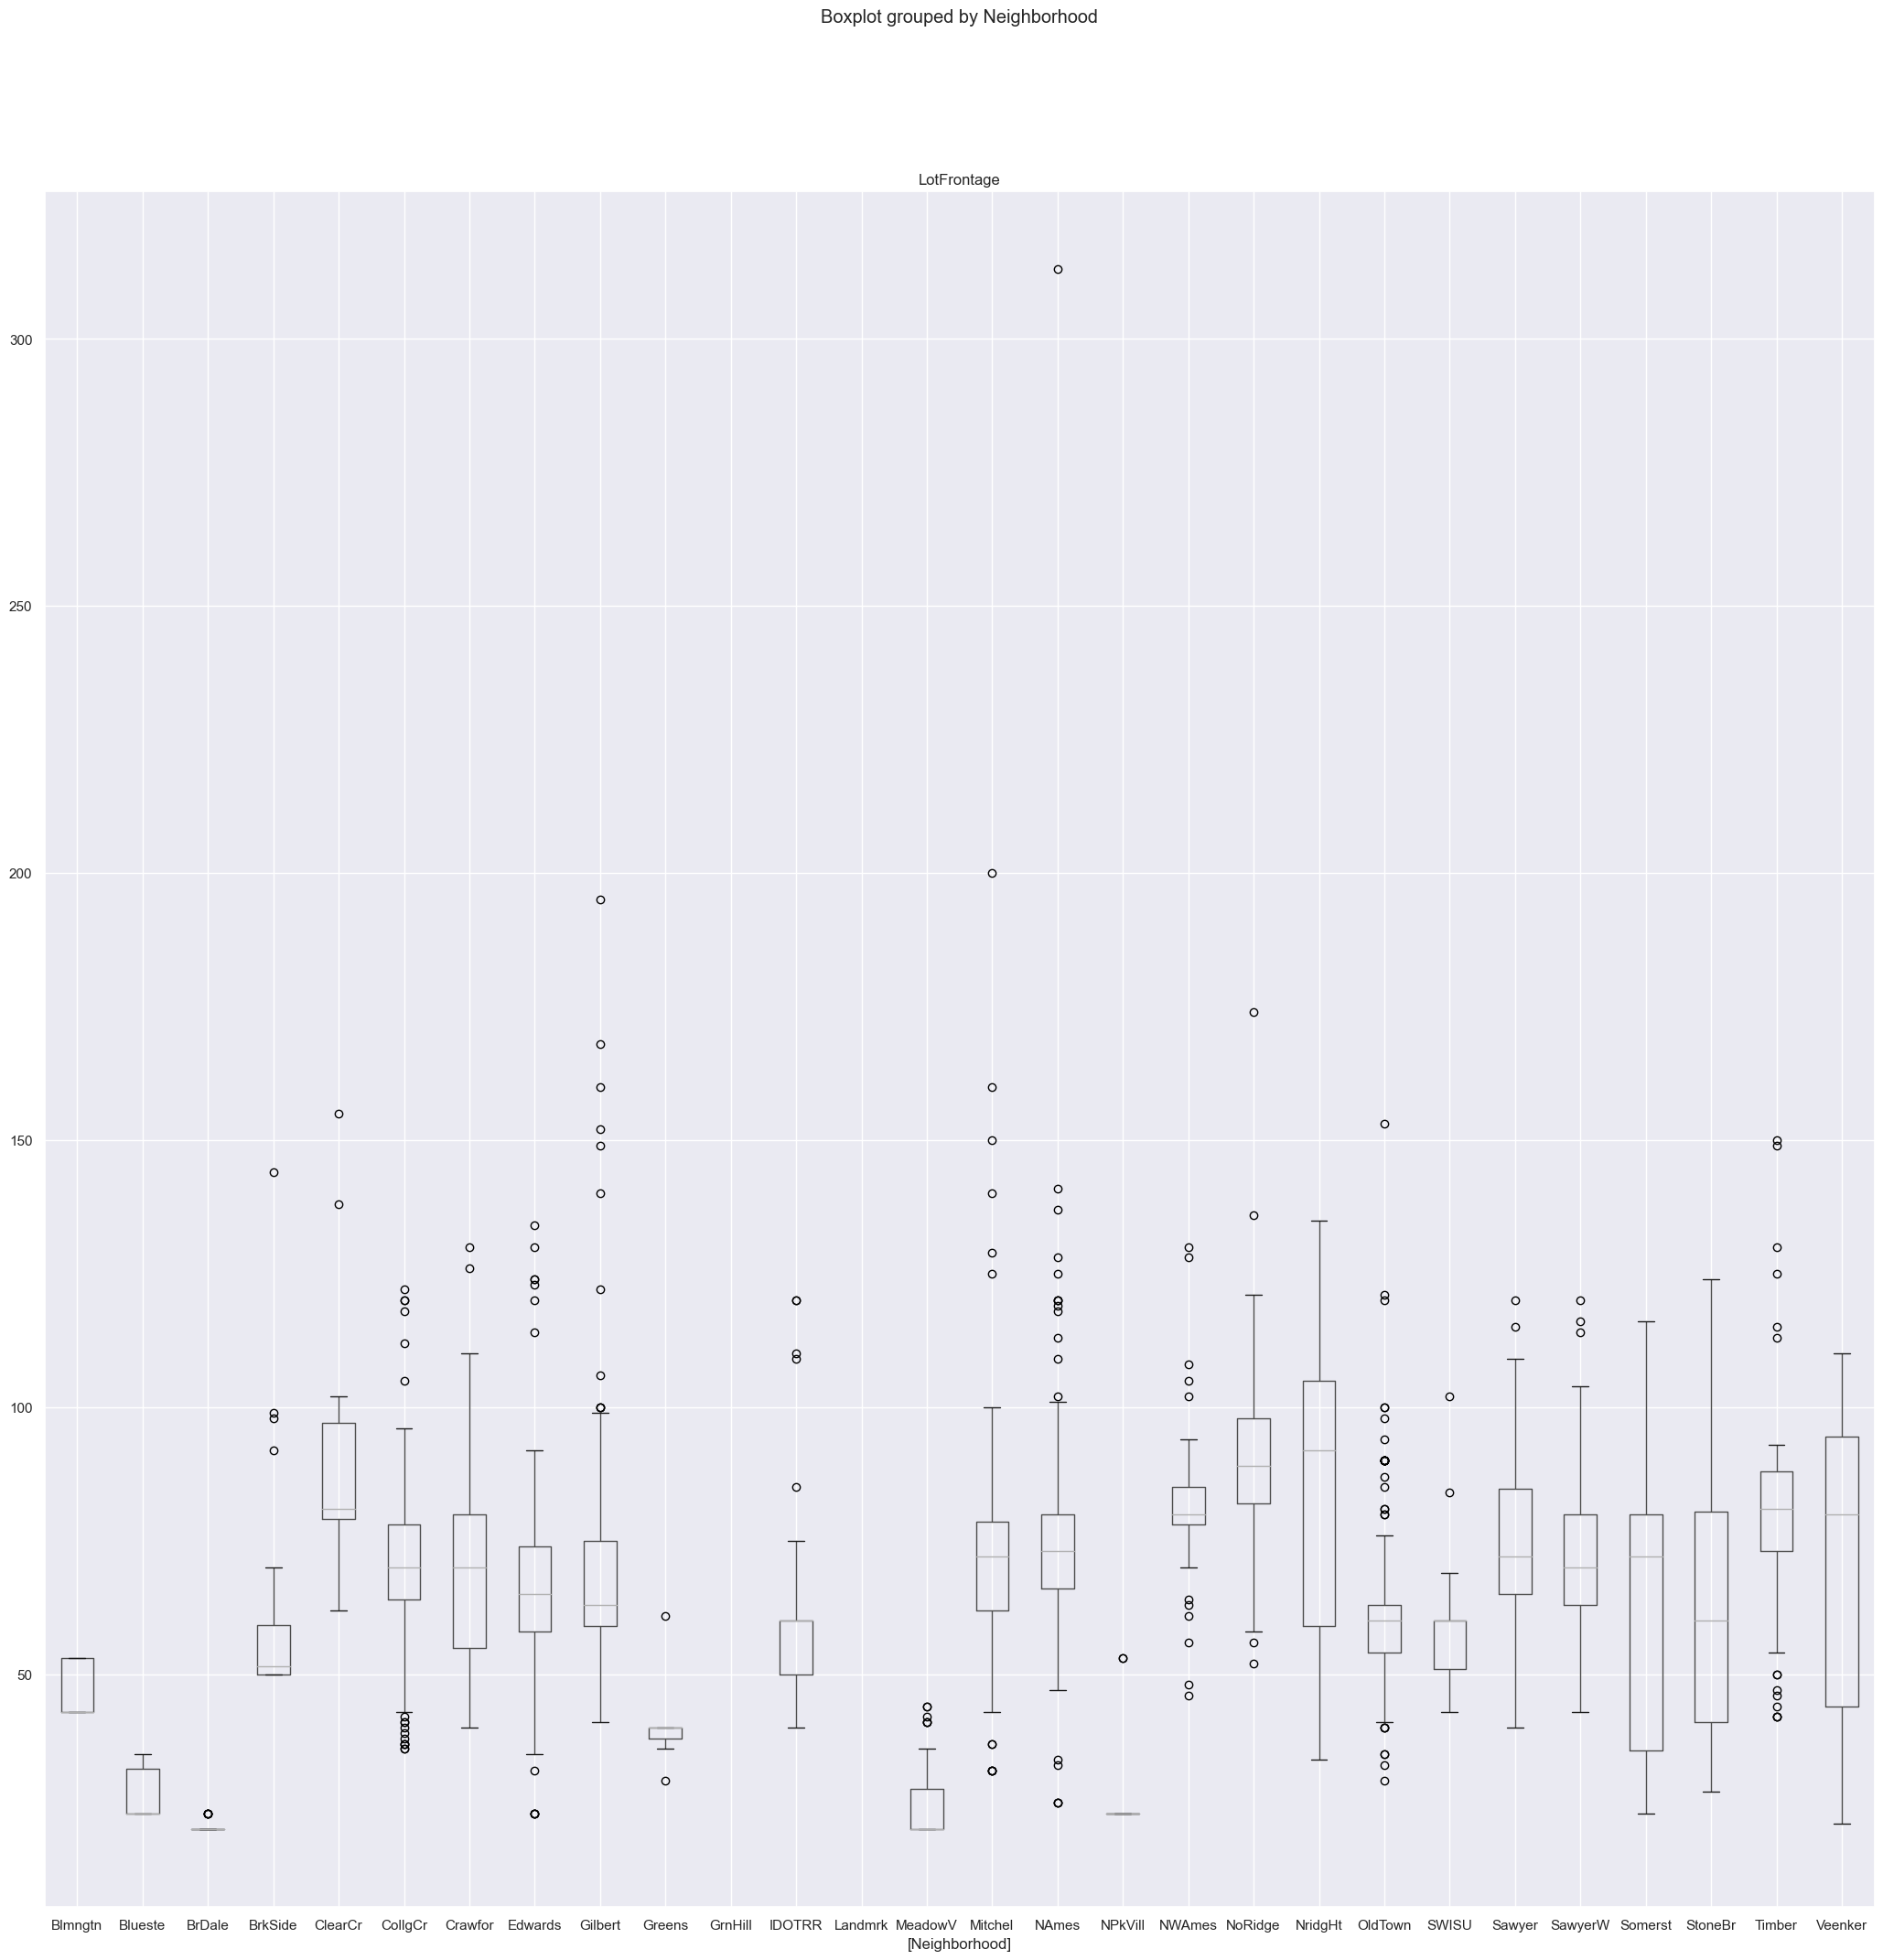

In [319]:
fig = train[['LotFrontage', 'Neighborhood']].boxplot(by='Neighborhood')
#plt.xticks(rotation=90)
plt.show()

I saw that the median values for each neighborhood varied, therefore I believe it would be irresponsible to use a shared median or mean among all missing values. Therefore, I will use the median value specific to the neighborhood that the house is located.

In [348]:
# Fill missing values in 'LotFrontage' column with median based on 'Neighborhood'
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/1140182882.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [321]:
train.FireplaceQu.unique()

array(['Gd', nan, 'Ex', 'TA', 'Fa', 'Po'], dtype=object)

In [322]:
train['FireplaceQu'].fillna("NoFireplace", inplace=True)

In [323]:
train.MasVnrType.unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [324]:
train['MasVnrType'].fillna("None", inplace=True)

In [325]:
train['MasVnrArea'].fillna(0, inplace=True)

In [326]:
print(train.BsmtQual.unique())
print(train.BsmtCond.unique())
print(train.BsmtExposure.unique())
print(train.BsmtFinType1.unique())
print(train.BsmtFinType2.unique())

['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['No' 'Mn' nan 'Gd' 'Av']
['Rec' 'GLQ' 'ALQ' 'Unf' nan 'BLQ' 'LwQ']
['Unf' 'ALQ' nan 'GLQ' 'BLQ' 'LwQ' 'Rec']


In [327]:
train['BsmtQual'].fillna("NoBsmt", inplace=True)
train['BsmtCond'].fillna("NoBsmt", inplace=True)
train['BsmtExposure'].fillna("NoBsmt", inplace=True)
train['BsmtFinType1'].fillna("NoBsmt", inplace=True)
train['BsmtFinType2'].fillna("NoBsmt", inplace=True)

In [328]:
train.Electrical.value_counts()

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [329]:
train['Electrical'].fillna("SBrkr", inplace=True)

Below we evaluate MiscFeature, which seemed to have a large amount of null values.

In [330]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Othr', 'Gar2', 'TenC'], dtype=object)

In [331]:
train.MiscFeature.value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [332]:
#looking at the total percentage of houses that include a MiscFeature... which is below 5%
((train.MiscFeature.isna().count() - train.MiscFeature.isna().sum()) / (train.MiscFeature.isna().count()) ) * 100

3.7596899224806206

In [333]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('MiscFeature', axis=1, inplace=True)

In [334]:
# as well I have to remove the values associated with the MiscFeature
train.drop('MiscVal', axis=1, inplace=True)

Below I will do the same with PoolQC and PoolSF

In [335]:
((train.PoolQC.isna().count() - train.PoolQC.isna().sum()) / (train.PoolQC.isna().count()) ) * 100

0.3488372093023256

In [336]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('PoolQC', axis=1, inplace=True)

In [338]:
train.drop('PoolArea', axis=1, inplace=True)

KeyError: "['PoolArea'] not found in axis"

In [339]:
train['Fence'].fillna("NoFence", inplace=True)

In [390]:
nulls = train.isnull().sum()
nulls[nulls > 0]

GarageCars    1
GarageArea    1
dtype: int64

In [363]:
train[train.LotFrontage.isna()]

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
109   916253320       1502     330000         120       RM          NaN   
683   916252170       1295     230000         120       RM          NaN   
1204  907230240       1320     137000         160       RH          NaN   

      LotArea Street    Alley LotShape  ... WoodDeckSF OpenPorchSF  \
109      9763   Pave  NoAlley      IR1  ...          0           0   
683      8239   Pave  NoAlley      IR1  ...          0           0   
1204     3612   Pave  NoAlley      IR1  ...          0          48   

     EnclosedPorch 3SsnPorch ScreenPorch    Fence MoSold YrSold SaleType  \
109              0         0           0  NoFence      9   2007      WD    
683              0         0           0  NoFence     11   2006      WD    
1204             0         0           0    MnPrv      6   2006      WD    

      SaleCondition  
109          Normal  
683          Normal  
1204         Normal  

[3 rows x 77 columns]

In [372]:
train

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
0     909176150        856     126000          30       RL         60.0   
1     905476230       1049     139500         120       RL         42.0   
2     911128020       1001     124900          30  C (all)         60.0   
3     535377150       1039     114000          70       RL         80.0   
4     534177230       1665     227000          60       RL         70.0   
...         ...        ...        ...         ...      ...          ...   
2575  903205040        952     121000          30       RL         51.5   
2576  905402060       1733     139600          20       RL         65.0   
2577  909275030       2002     145000          90       RH         82.0   
2578  907192040       1842     217500          60       RL         70.0   
2579  906223180       1911     215000          60       RL         80.0   

      LotArea Street    Alley LotShape LandContour Utilities LotConfig  \
0        7890   Pave  NoAlley      Reg         Lvl    AllPub    Corner   
1        4235   Pave  NoAlley      Reg         Lvl    AllPub    Inside   
2        6060   Pave  NoAlley      Reg         Lvl    AllPub    Inside   
3        8146   Pave  NoAlley      Reg         Lvl    AllPub    Corner   
4        8400   Pave  NoAlley      Reg         Lvl    AllPub    Inside   
...       ...    ...      ...      ...         ...       ...       ...   
2575     8854   Pave  NoAlley      Reg         Lvl    AllPub    Inside   
2576    13680   Pave  NoAlley      IR1         Lvl    AllPub   CulDSac   
2577     6270   Pave  NoAlley      Reg         HLS    AllPub    Inside   
2578     8826   Pave  NoAlley      Reg         Lvl    AllPub    Inside   
2579     9554   Pave  NoAlley      IR1         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl        SWISU       Norm       Norm     1Fam     1Story   
1          Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2          Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3          Gtl      OldTown       Norm       Norm     1Fam     2Story   
4          Gtl       NWAmes       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
2575       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
2576       Gtl      Edwards       Norm       Norm     1Fam     1Story   
2577       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
2578       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2579       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               6            6       1939          1950     Gable  CompShg   
1               5            5       1984          1984     Gable  CompShg   
2               5            9       1930          2007       Hip  CompShg   
3               4            8       1900          2003     Gable  CompShg   
4               8            6       2001          2001     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
2575            6            6       1916          1950     Gable  CompShg   
2576            3            5       1955          1955       Hip  CompShg   
2577            5            6       1949          1950     Gable  CompShg   
2578            7            5       2000          2000     Gable  CompShg   
2579            8            5       1993          1994     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1        HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2        MetalSd     MetalSd       None         0.0        Gd        TA   
3        MetalSd     MetalSd       None         0.0        Gd        Gd   
4        VinylSd     VinylSd     

In [383]:
# used the following commented code to check specific cases of the LotFootage not cleaning correctly
# turns out there were a few neighborhoods that don't have any values in the column, very minimal ~3
# train[train.PID == 916253320]
# train.Neighborhood.value_counts()
train = train[(train['Neighborhood'] != 'GrnHill') & (train['Neighborhood'] != 'Landmrk')]

In [392]:
#train[train['BsmtFinSF1'].isna()] #one edge case where there is no bsmt so set zeroes, same for rest
train['BsmtFinSF1'].fillna(0, inplace=True)   
train['BsmtFinSF2'].fillna(0, inplace=True)   
train['BsmtUnfSF'].fillna(0, inplace=True)   
train['TotalBsmtSF'].fillna(0, inplace=True)   
train['BsmtFullBath'].fillna(0, inplace=True)   
train['BsmtHalfBath'].fillna(0, inplace=True)   
train['GarageCars'].fillna(0, inplace=True)   
train['GarageArea'].fillna(0, inplace=True)   

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/1705839628.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/1705839628.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/1705839628.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipyker

In [393]:
nulls = train.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

We have cleaned the missing values.

# Exploratory Data Analysis

The sale price of the houses in the dataset have a right skew.

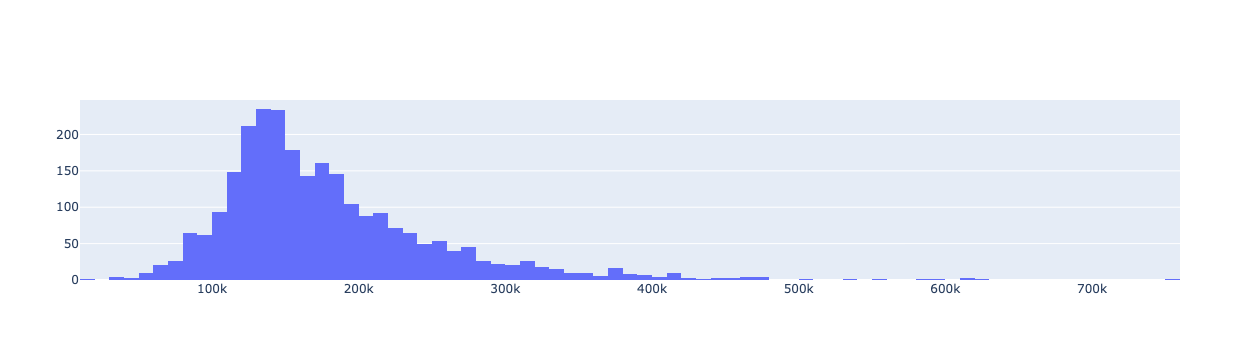

In [396]:
sp_fig = go.Figure(data=[go.Histogram(x=train.SalePrice)])
sp_fig

In [397]:
train.SalePrice.describe()

count      2576.000000
mean     177990.228261
std       75017.585880
min       12789.000000
25%      129900.000000
50%      159900.000000
75%      209500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [402]:
train[train["SalePrice"] < 35000]

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
427  902207130        832      12789          30       RM         68.0   
558  902477120        720      34900          30  C (all)         60.0   

     LotArea Street    Alley LotShape LandContour Utilities LotConfig  \
427     9656   Pave  NoAlley      Reg         Lvl    AllPub    Inside   
558     7879   Pave  NoAlley      Reg         Lvl    AllPub    Inside   

    LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
427       Gtl      OldTown       Norm       Norm     1Fam     1Story   
558       Gtl       IDOTRR       Norm       Norm     1Fam     1Story   

     OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
427            2            2       1923          1970     Gable  CompShg   
558            4            5       1920          1950     Gable  CompShg   

    Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
427     AsbShng     AsbShng       None         0.0        TA        Fa   
558     Wd Sdng     Wd Sdng       None         0.0        TA        TA   

    Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
427     BrkTil       Fa       Fa           No          Unf         0.0   
558     CBlock       TA       TA           No          Rec       495.0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
427          Unf         0.0      678.0        678.0    GasA        TA   
558          Unf         0.0      225.0        720.0    GasA        TA   

    CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
427          N      SBrkr       832         0             0           0.0   
558          N      FuseA       720         0             0           0.0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
427           0.0         1         0             2             1          TA   
558           0.0         1         0             2             1          TA   

     TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt  \
427             5        Typ           1           Gd     Detchd       1928.0   
558             4        Typ           0  NoFireplace   NoGarage          0.0   

    GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
427          Unf         2.0       780.0         Fa         Fa          N   
558     NoGarage         0.0         0.0   NoGarage   NoGarage          N   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch    Fence  \
427           0            0              0          0            0  NoFence   
558           0          523            115          0            0     GdWo   

     MoSold  YrSold SaleType SaleCondition  
427       6    2010      WD        Abnorml  
558      11    2009      WD        Abnorml

The mean is higher than the median, and we can see many outliers, which can impact the results of our models.

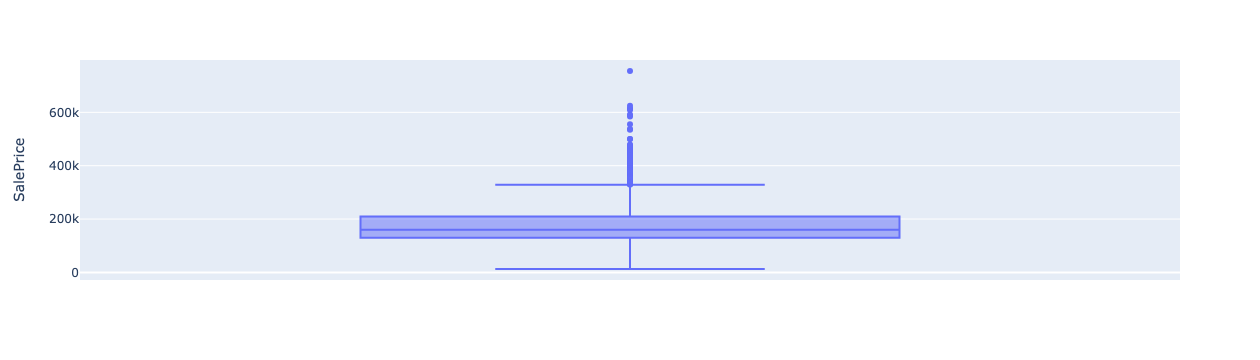

In [398]:
px.box(train,y='SalePrice')

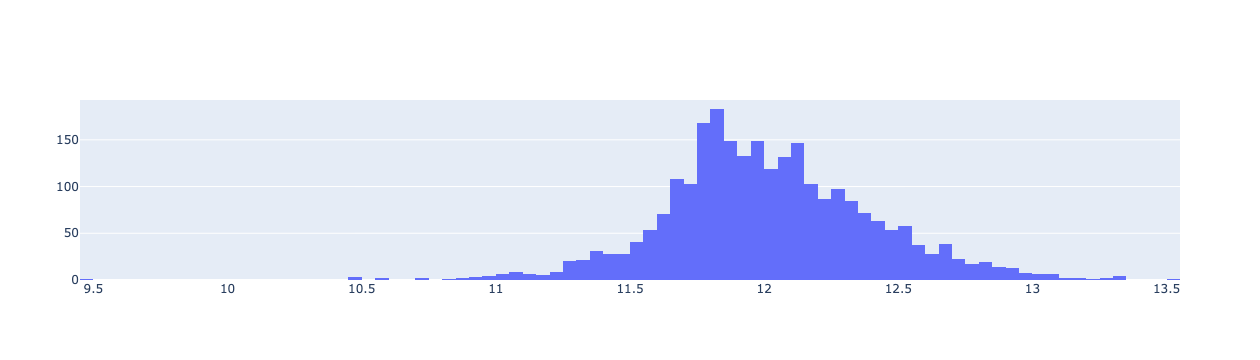

In [399]:
go.Figure(data=[go.Histogram(x=np.log(train.SalePrice))])

In [404]:
logSalePrice = np.log(train.SalePrice)

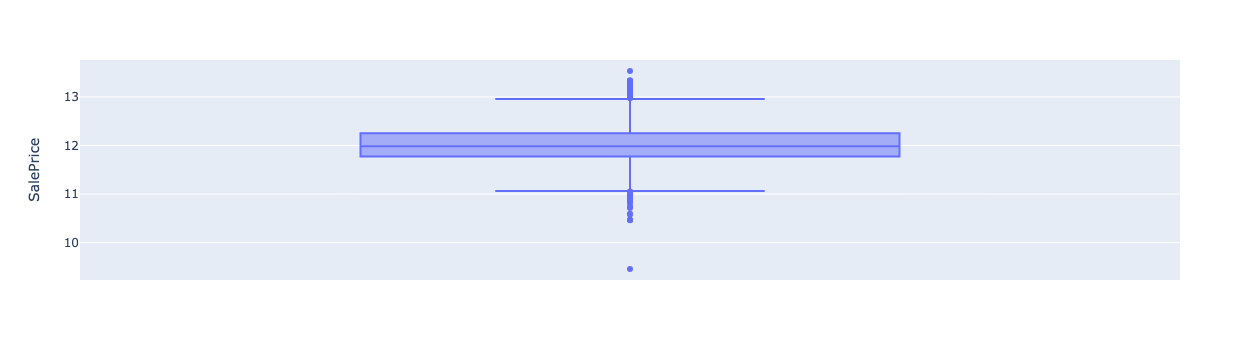

In [405]:
px.box(logSalePrice,y='SalePrice')

As we can see, there are many outliers in the data. Although the typical accepted range is usually 1.5 times the IQR, we will do 3 times the IQR to try and conserve some of the value in those outliers

## Finding & Dealing with Outliers

In [408]:
train.shape

(2576, 77)

In [407]:
Q1 = train['SalePrice'].quantile(.25)
Q3 = train['SalePrice'].quantile(.75)
IQR = Q3 - Q1
new_bounds = Q3 + 3 * IQR

In [409]:
train.drop(train[train['SalePrice'] > new_bounds].index, axis=0, inplace = True)

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/477014152.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [410]:
train.shape

(2553, 77)

In [415]:
#train set - outliers comes out to 23 records removed
2576 - 2553

23

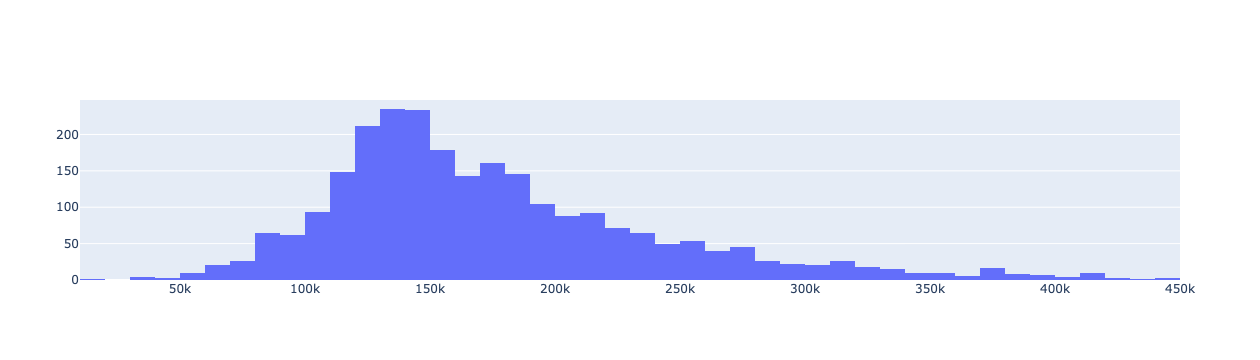

In [411]:
go.Figure(data=[go.Histogram(x=train.SalePrice)])

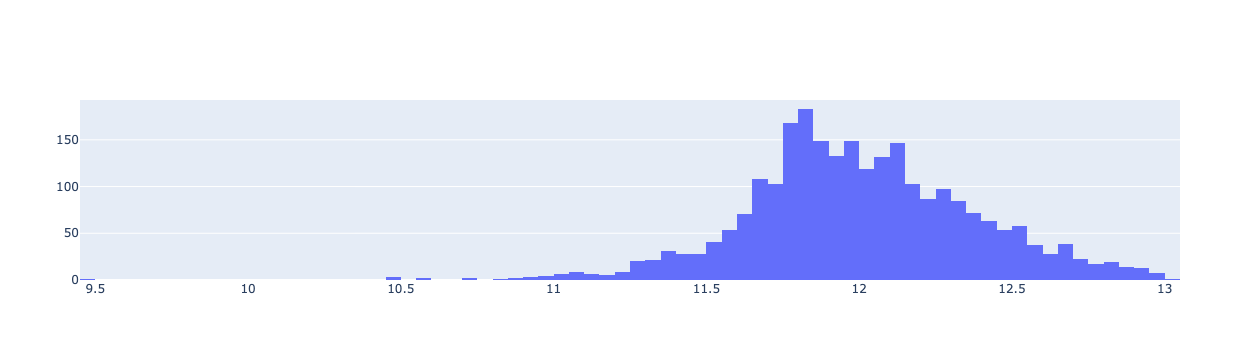

In [412]:
go.Figure(data=[go.Histogram(x=np.log(train.SalePrice))])

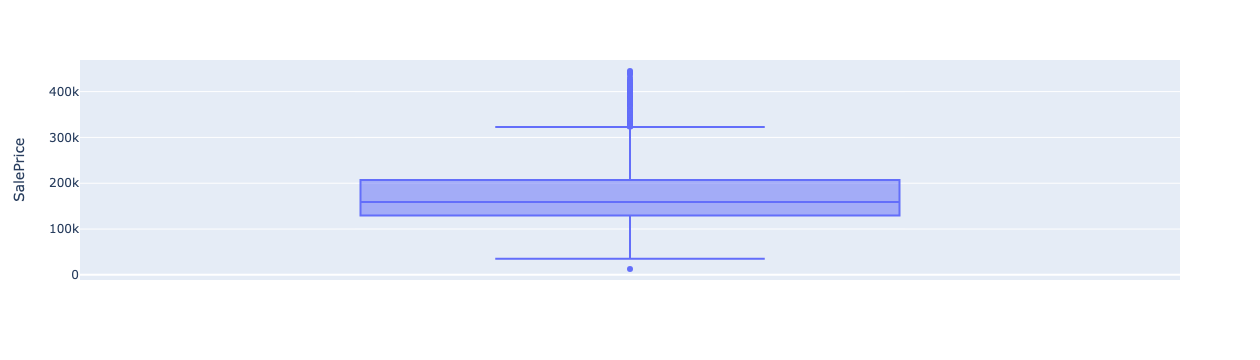

In [413]:
px.box(train,y='SalePrice')

This now looks a bit better than our first box plot of the SalePrice untouched

Lets look at a correlation of the numeric features in the dataset

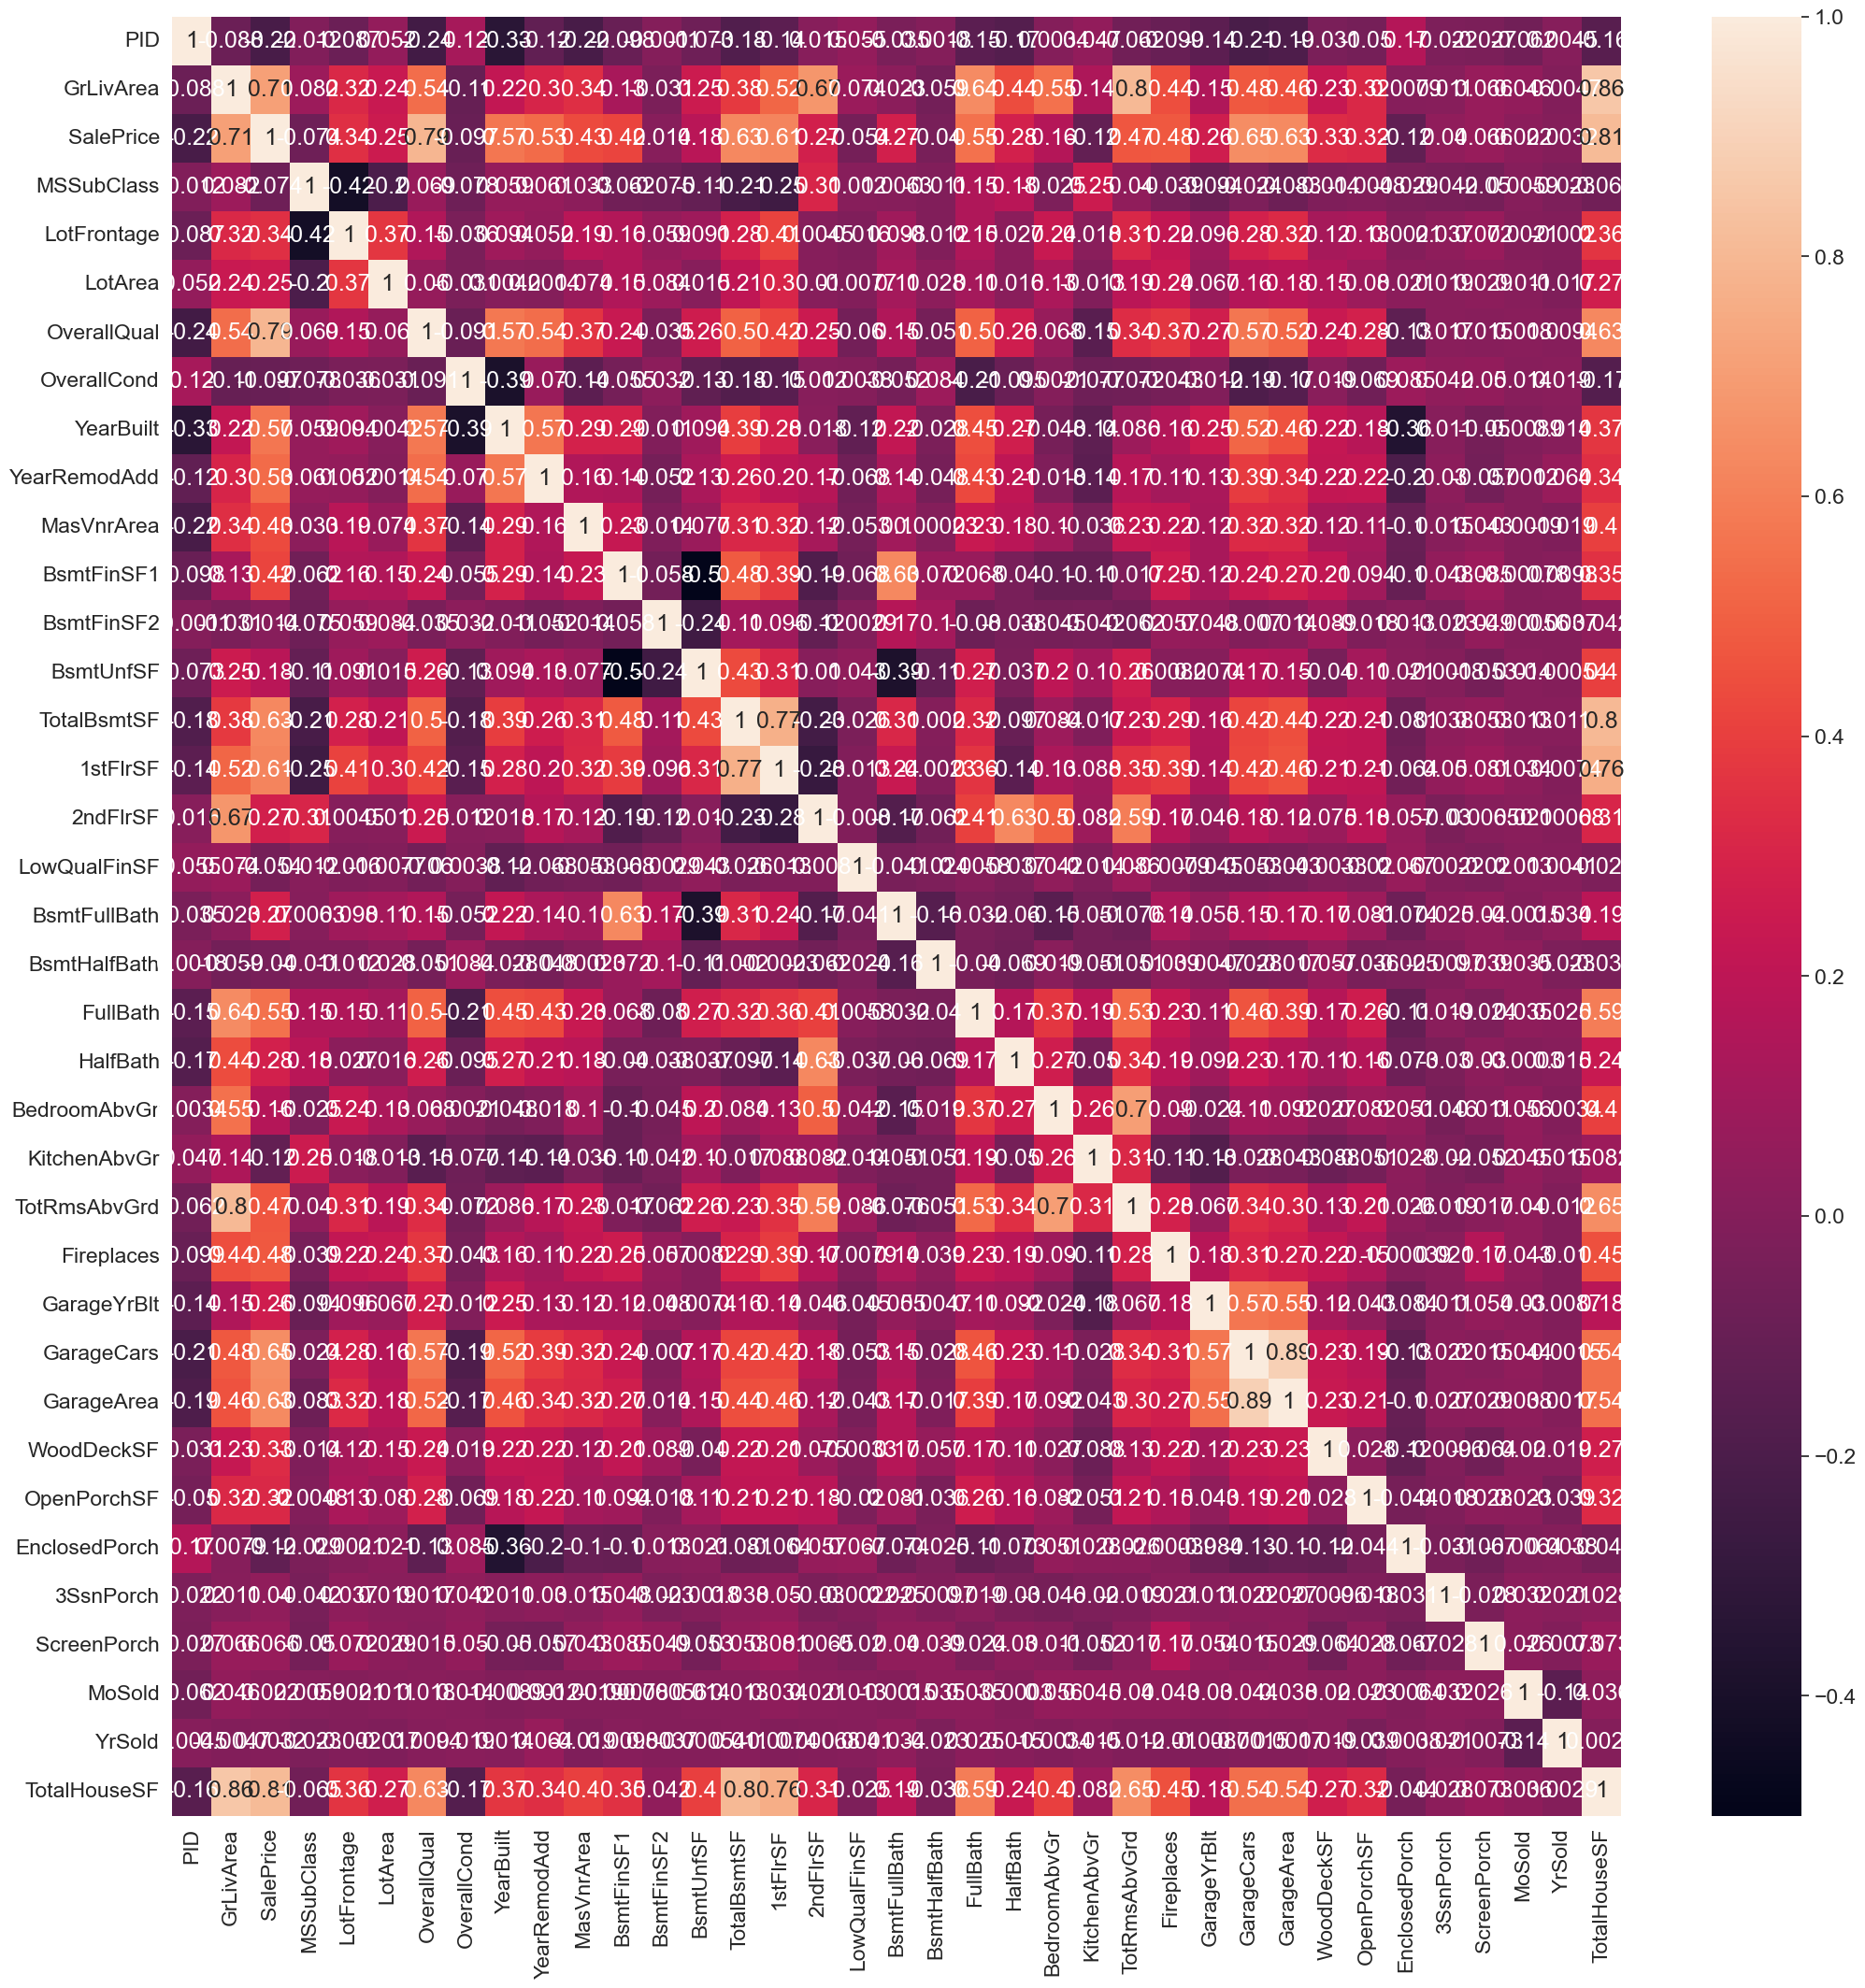

In [459]:
train_numerics = train.select_dtypes(include=[np.number])
train_corr = train_numerics.corr()
heatmap = sns.heatmap(train_corr, annot=True)  
heatmap
sns.set(rc={'figure.figsize':(25,25)})

Here are the top 10 results from the correlation matrix for numerical features:

In [460]:
train_top10_corr = train_corr['SalePrice'].sort_values(ascending = False).head(11)
train_top10_corr

SalePrice       1.000000
TotalHouseSF    0.810066
OverallQual     0.790983
GrLivArea       0.708676
GarageCars      0.645784
GarageArea      0.634398
TotalBsmtSF     0.627229
1stFlrSF        0.613702
YearBuilt       0.568551
FullBath        0.550805
YearRemodAdd    0.534056
Name: SalePrice, dtype: float64

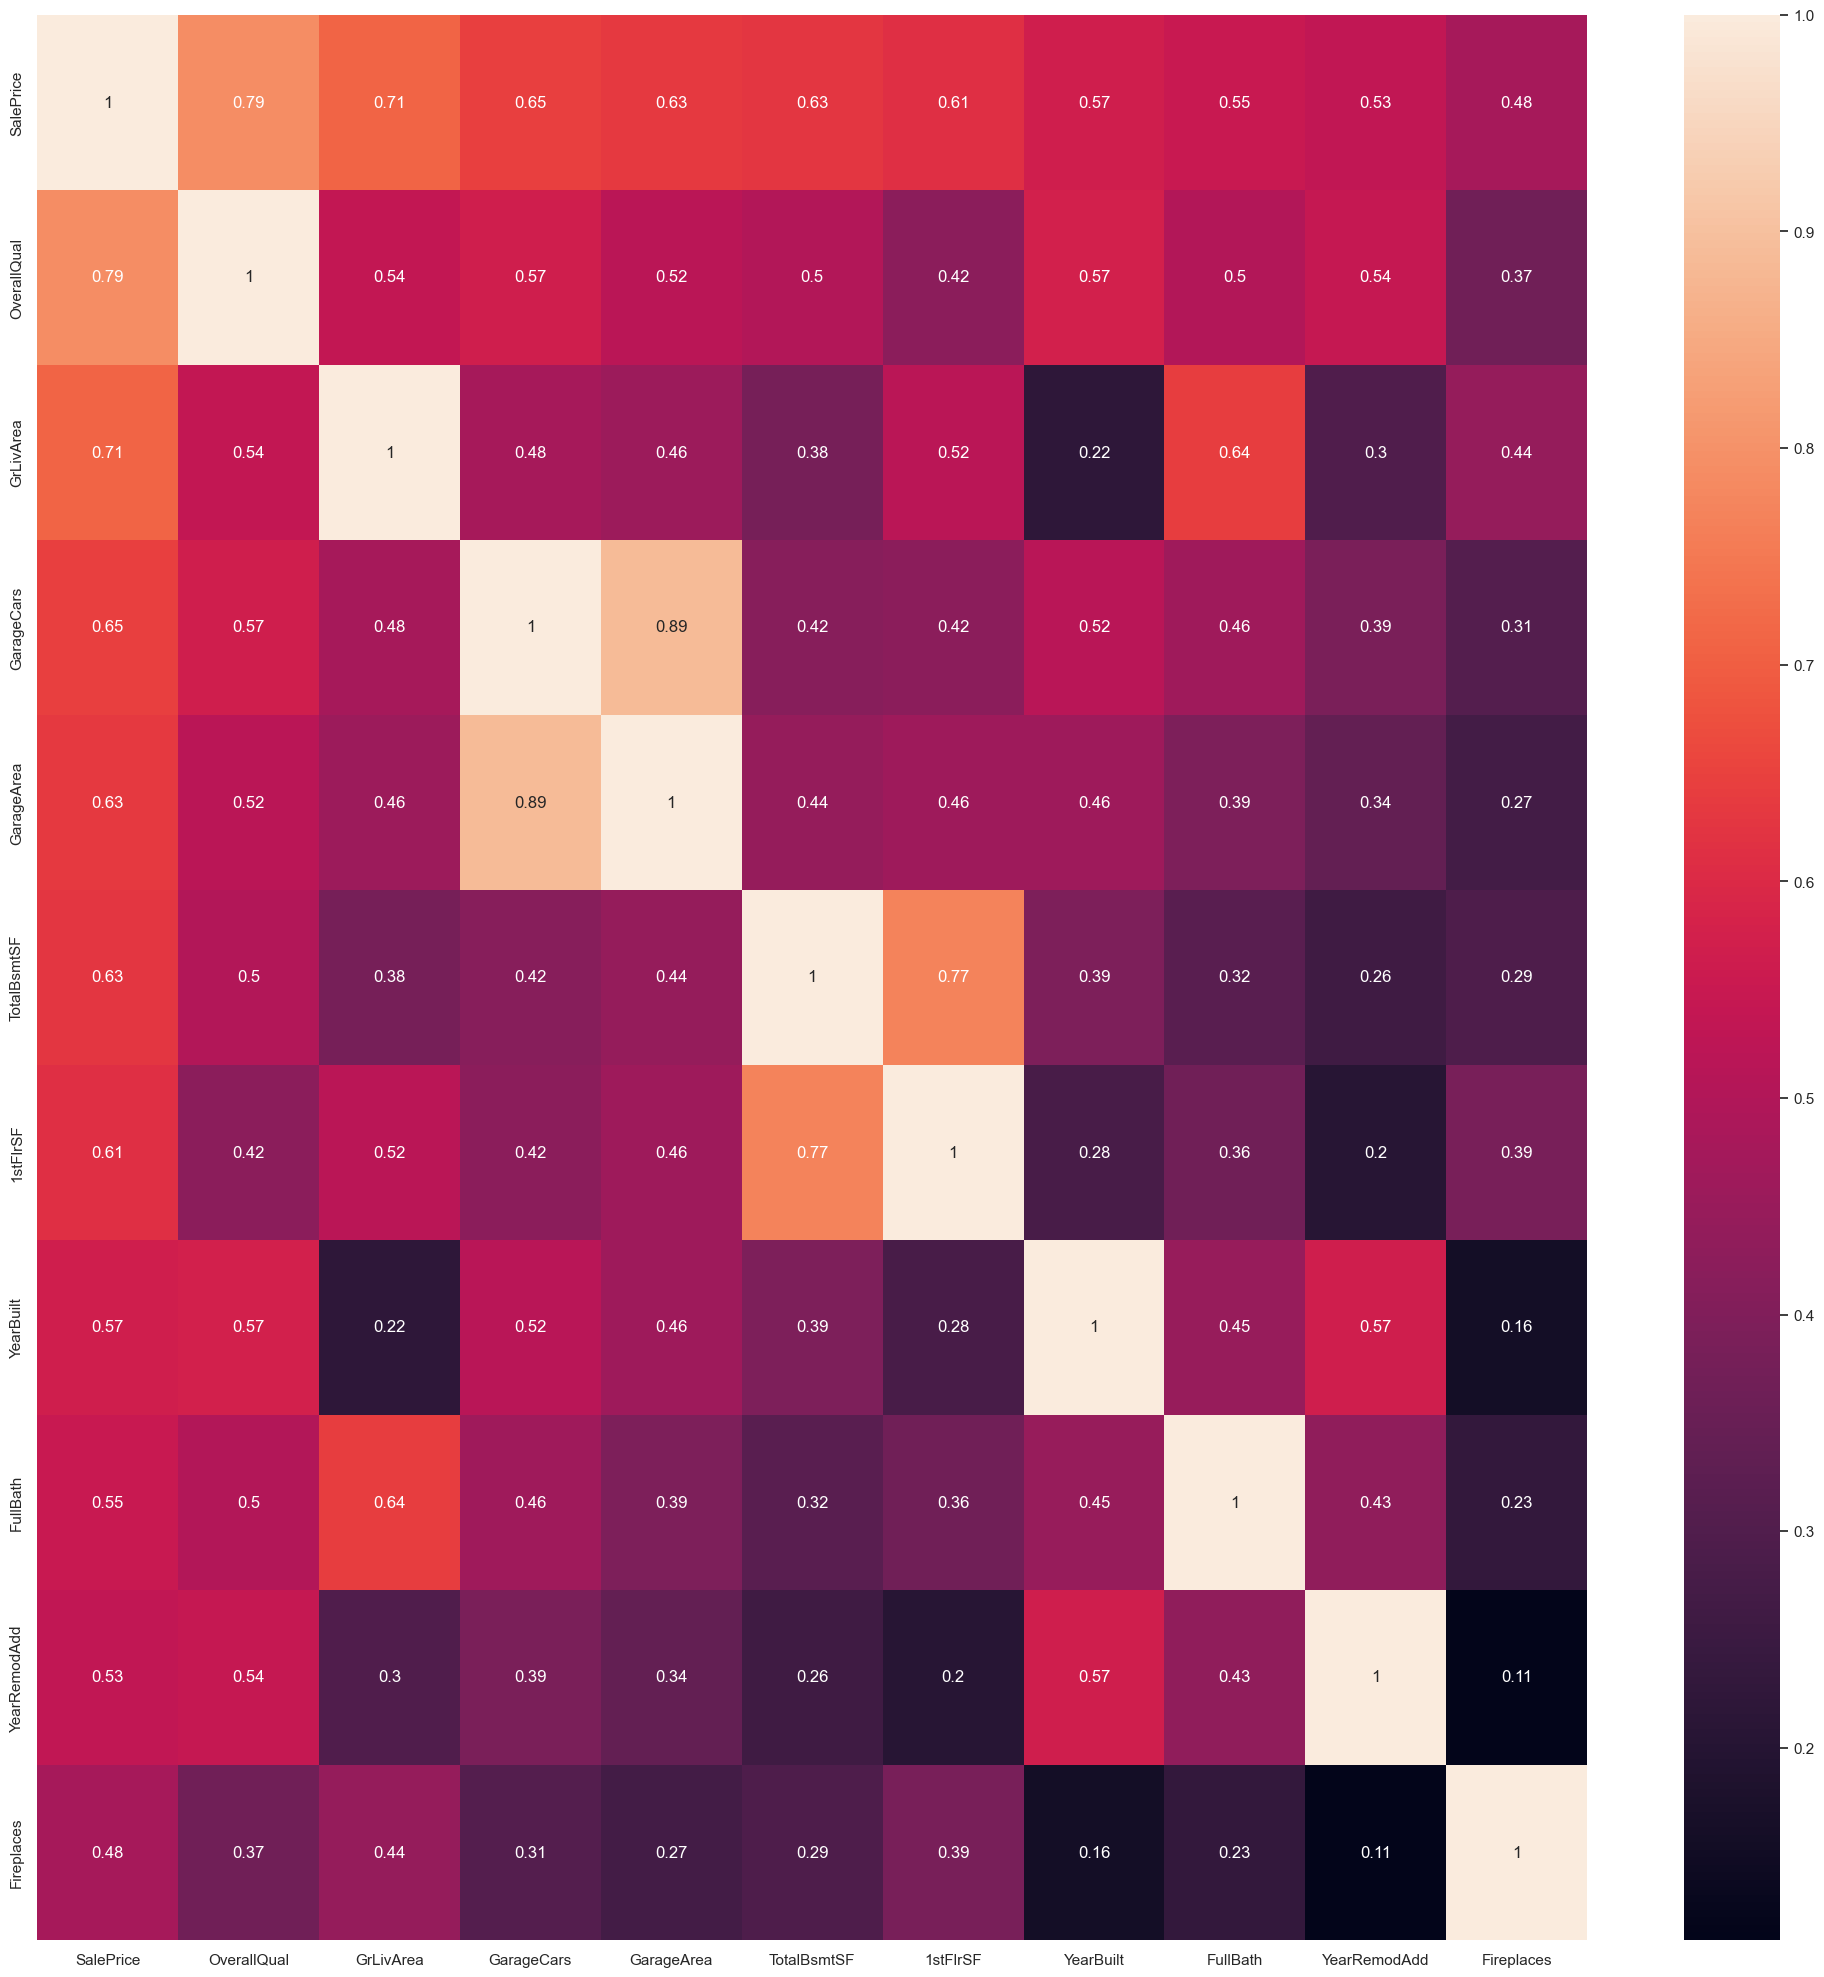

<Figure size 1000x800 with 0 Axes>

In [420]:

top_10_corr = train_numerics[train_corr['SalePrice'].nlargest(11).index].corr()
heatmap_top10 = sns.heatmap(top_10_corr, annot=True)
heatmap_top10
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)

GarageArea & GarageCars are highly correlated with eachother, which can indicate multicollinearity. We see similar trends with SF, we will have to feature engineer or remove these.

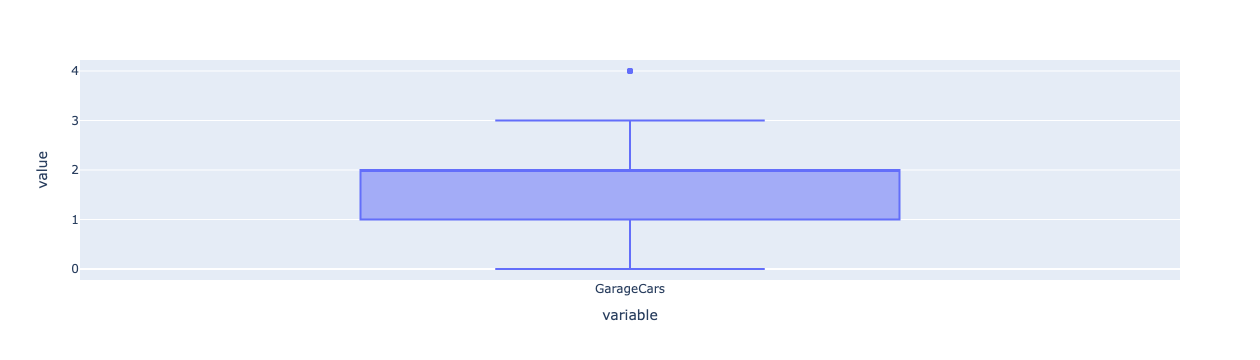

In [285]:
px.box(train,y=['GarageCars'])

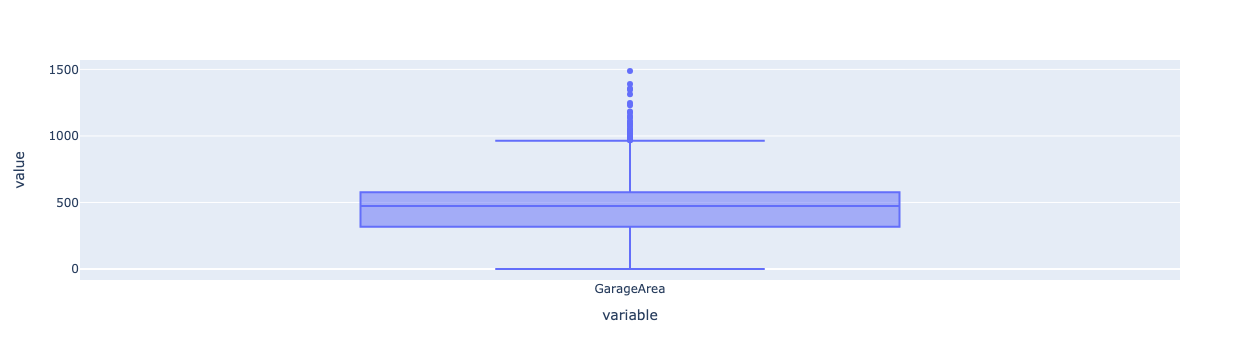

In [403]:
px.box(train,y=['GarageArea'])

Lets look at the categorical variables as well:

In [280]:
train_cats = train.select_dtypes(exclude=[np.number])

train_cats_encoded = pd.get_dummies(train, columns=train_cats.columns, drop_first=True)

train_cats_encoded

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0          2003          2003       196.0         706  ...               0   
1          1976          1976         0.0         978  ...               0   
2          2001          2002       162.0         486  ...               0   
3          1915          1970         0.0         216  ...               0   
4          2000          2000       350.0         655  ...               0   
...         ...           ...         ...         ...  ...             ...   
1455       1999          2000         0.0           0  ...               0   
1456       1978          1988       119.0         790  ...               0   
1457       1941          2006         0.0         275  ...               0   
1458       1950          1996         0.0          49  ...               0   
1459       1965          1965         0.0         830  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                     1                      0  
1457                     1      

# Feature Engineering

In [457]:
train['TotalHouseSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
train.TotalHouseSF

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_11686/2596982889.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       1712.0
1       2098.0
2       1838.0
3       1444.0
4       2475.0
         ...  
2575    1904.0
2576    1733.0
2577    3003.0
2578    2827.0
2579    2688.0
Length: 2553, dtype: float64

<Axes: >

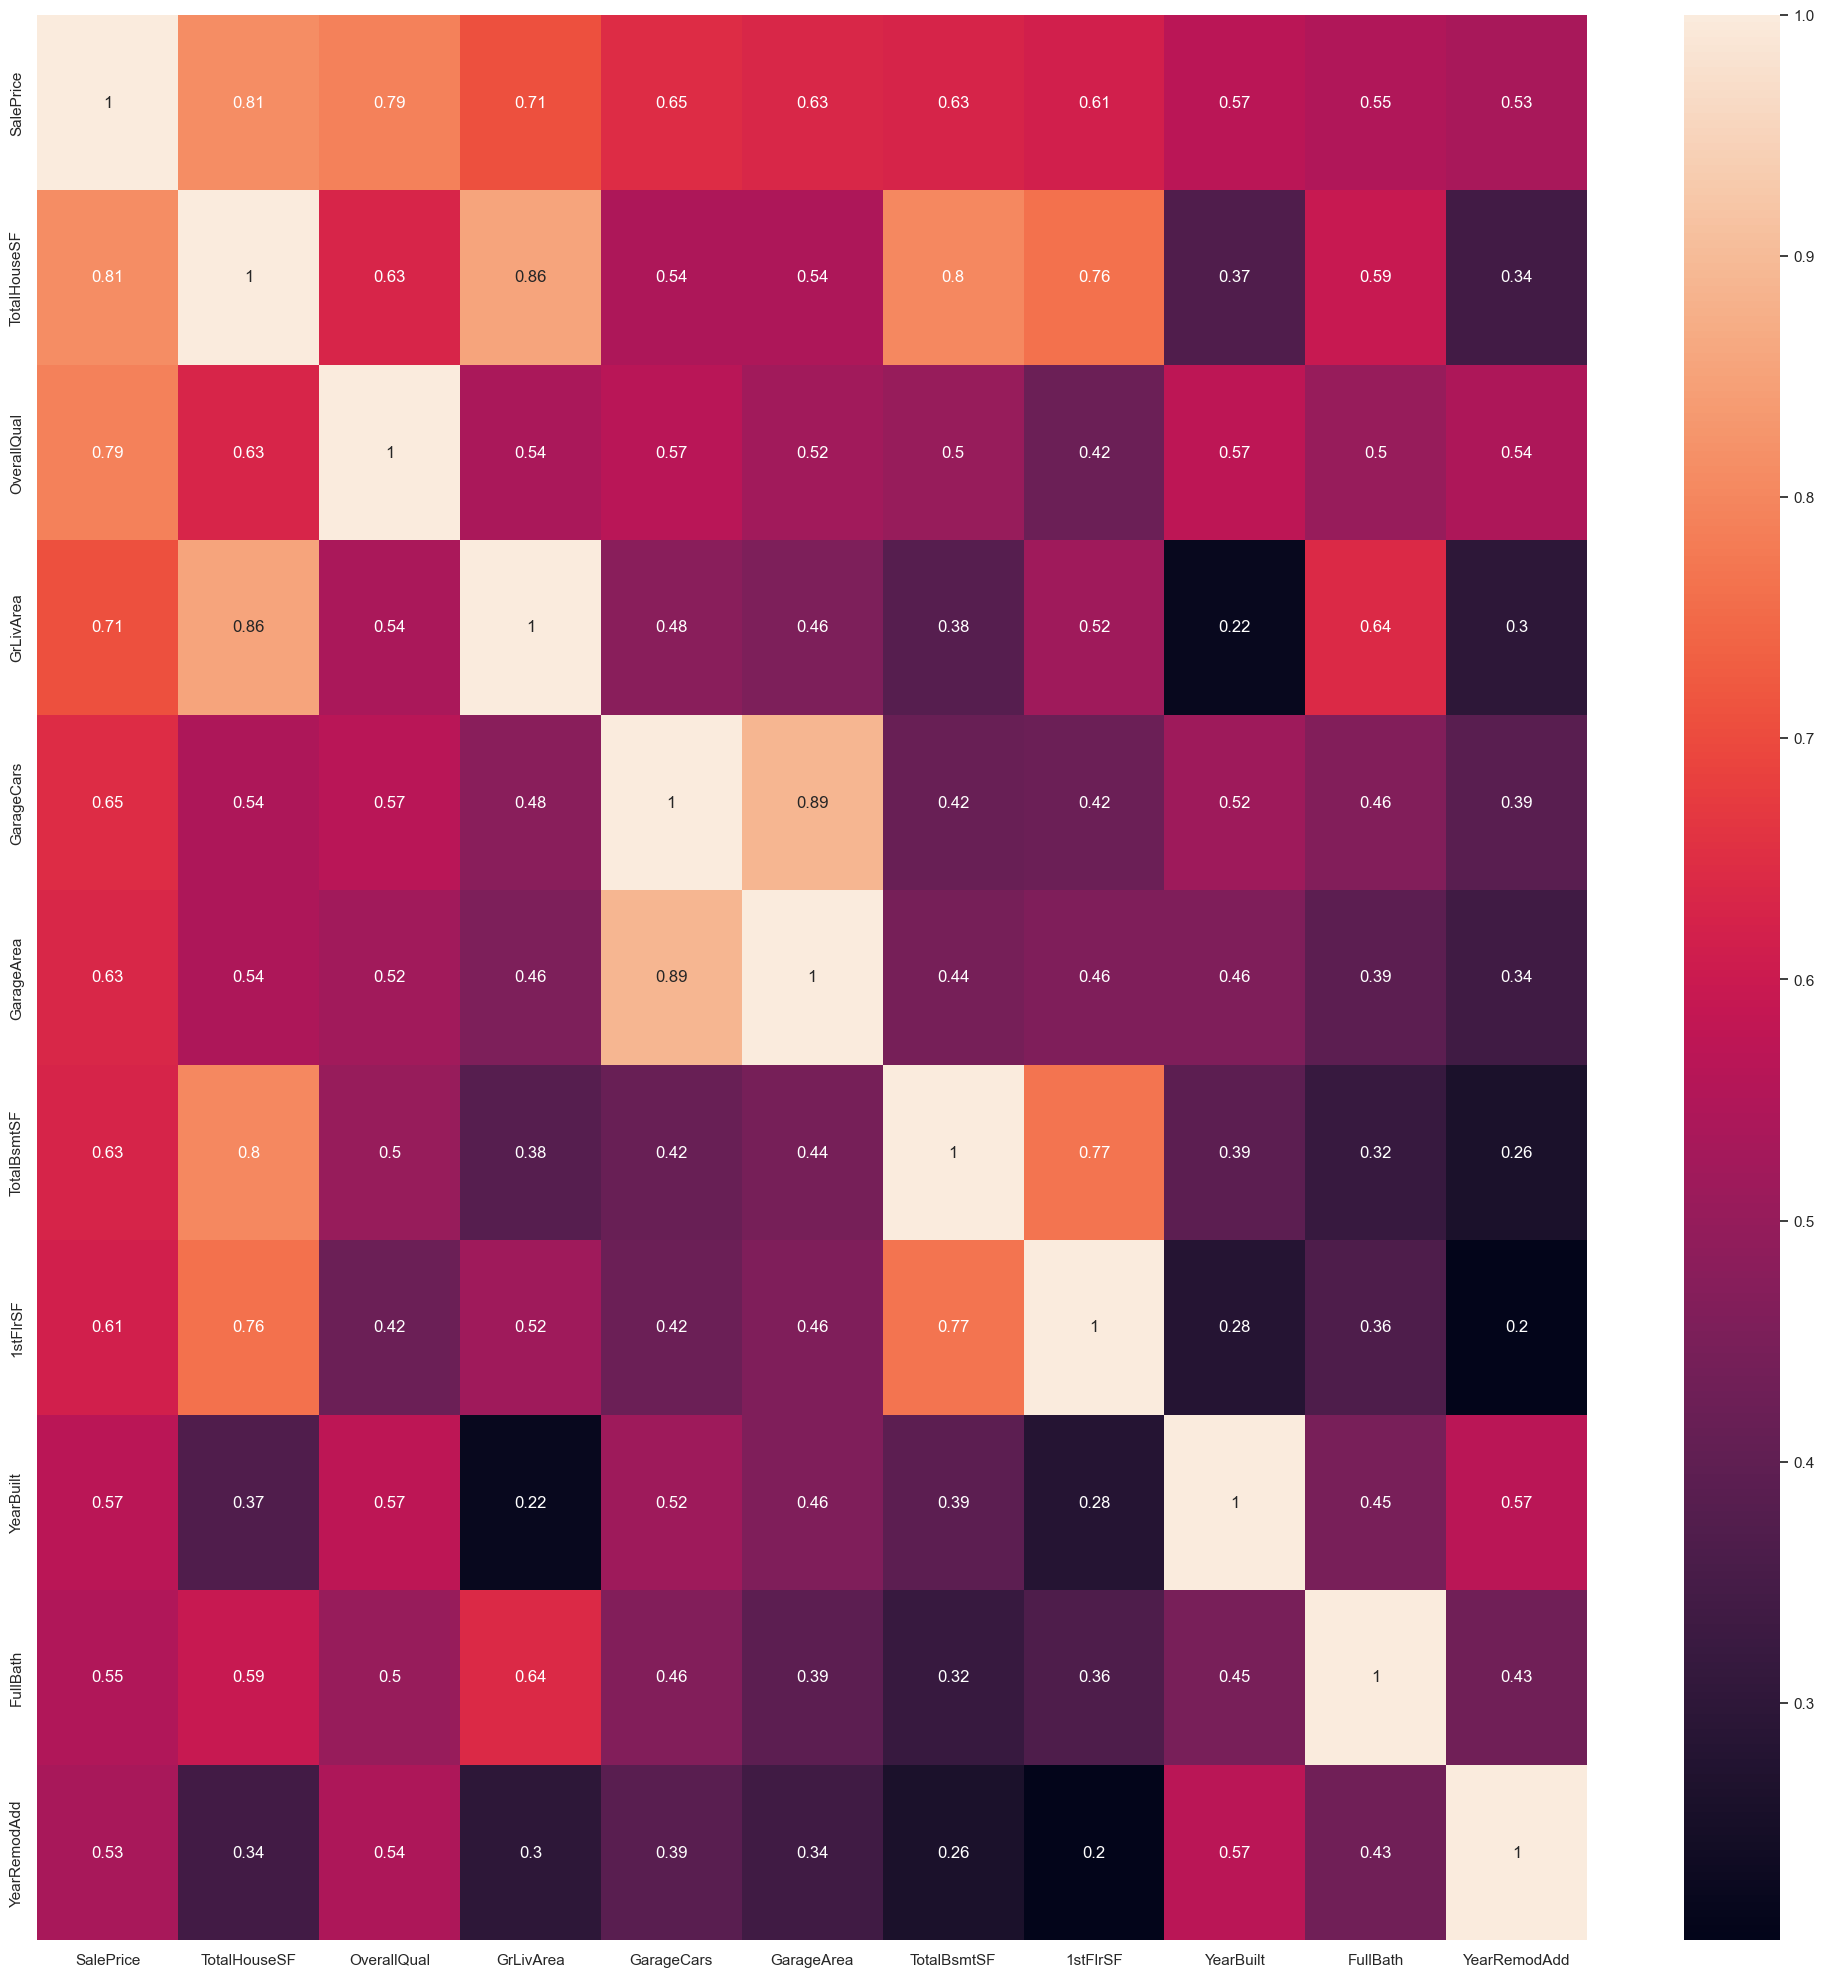

In [461]:

top_10_corr = train_numerics[train_corr['SalePrice'].nlargest(11).index].corr()
heatmap_top10 = sns.heatmap(top_10_corr, annot=True)
heatmap_top10

TotalHouseSF is very correlated and it will remove some of our features that are seeing some potential multicollinearity. We can still do VIF to confirm.

In [465]:
#performing VIF on GarageArea and GarageCars to see if there is multicollinearity. Conceptually I would think so, numbers to prove.

#we will select the predictor and the target variables
predictors = ["GarageArea", "GarageCars"]
target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_Garage = pd.DataFrame()
vif_Garage['Variables'] = subset_train.columns
vif_Garage['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]

# Display the VIF DataFrame for 'ab' and 'ac'
print(vif_Garage[vif_Garage['Variables'].isin(predictors)])

    Variables       VIF
1  GarageArea  4.905105
2  GarageCars  5.027748


As shown, we can see there is a moderate to high amount of multicollinearity among these two columns, I will remove GarageCars and keep GarageArea. Part of the thought is area is covering the space of the garage and not just counting by cars which can be varying. Some people have wider/longer cars, workshops in their garage, etc.

Right now, some good concrete features to include are TotalHouseSF and GarageArea, I am going to start keeping track of which columns to remove from our first top 10 model.

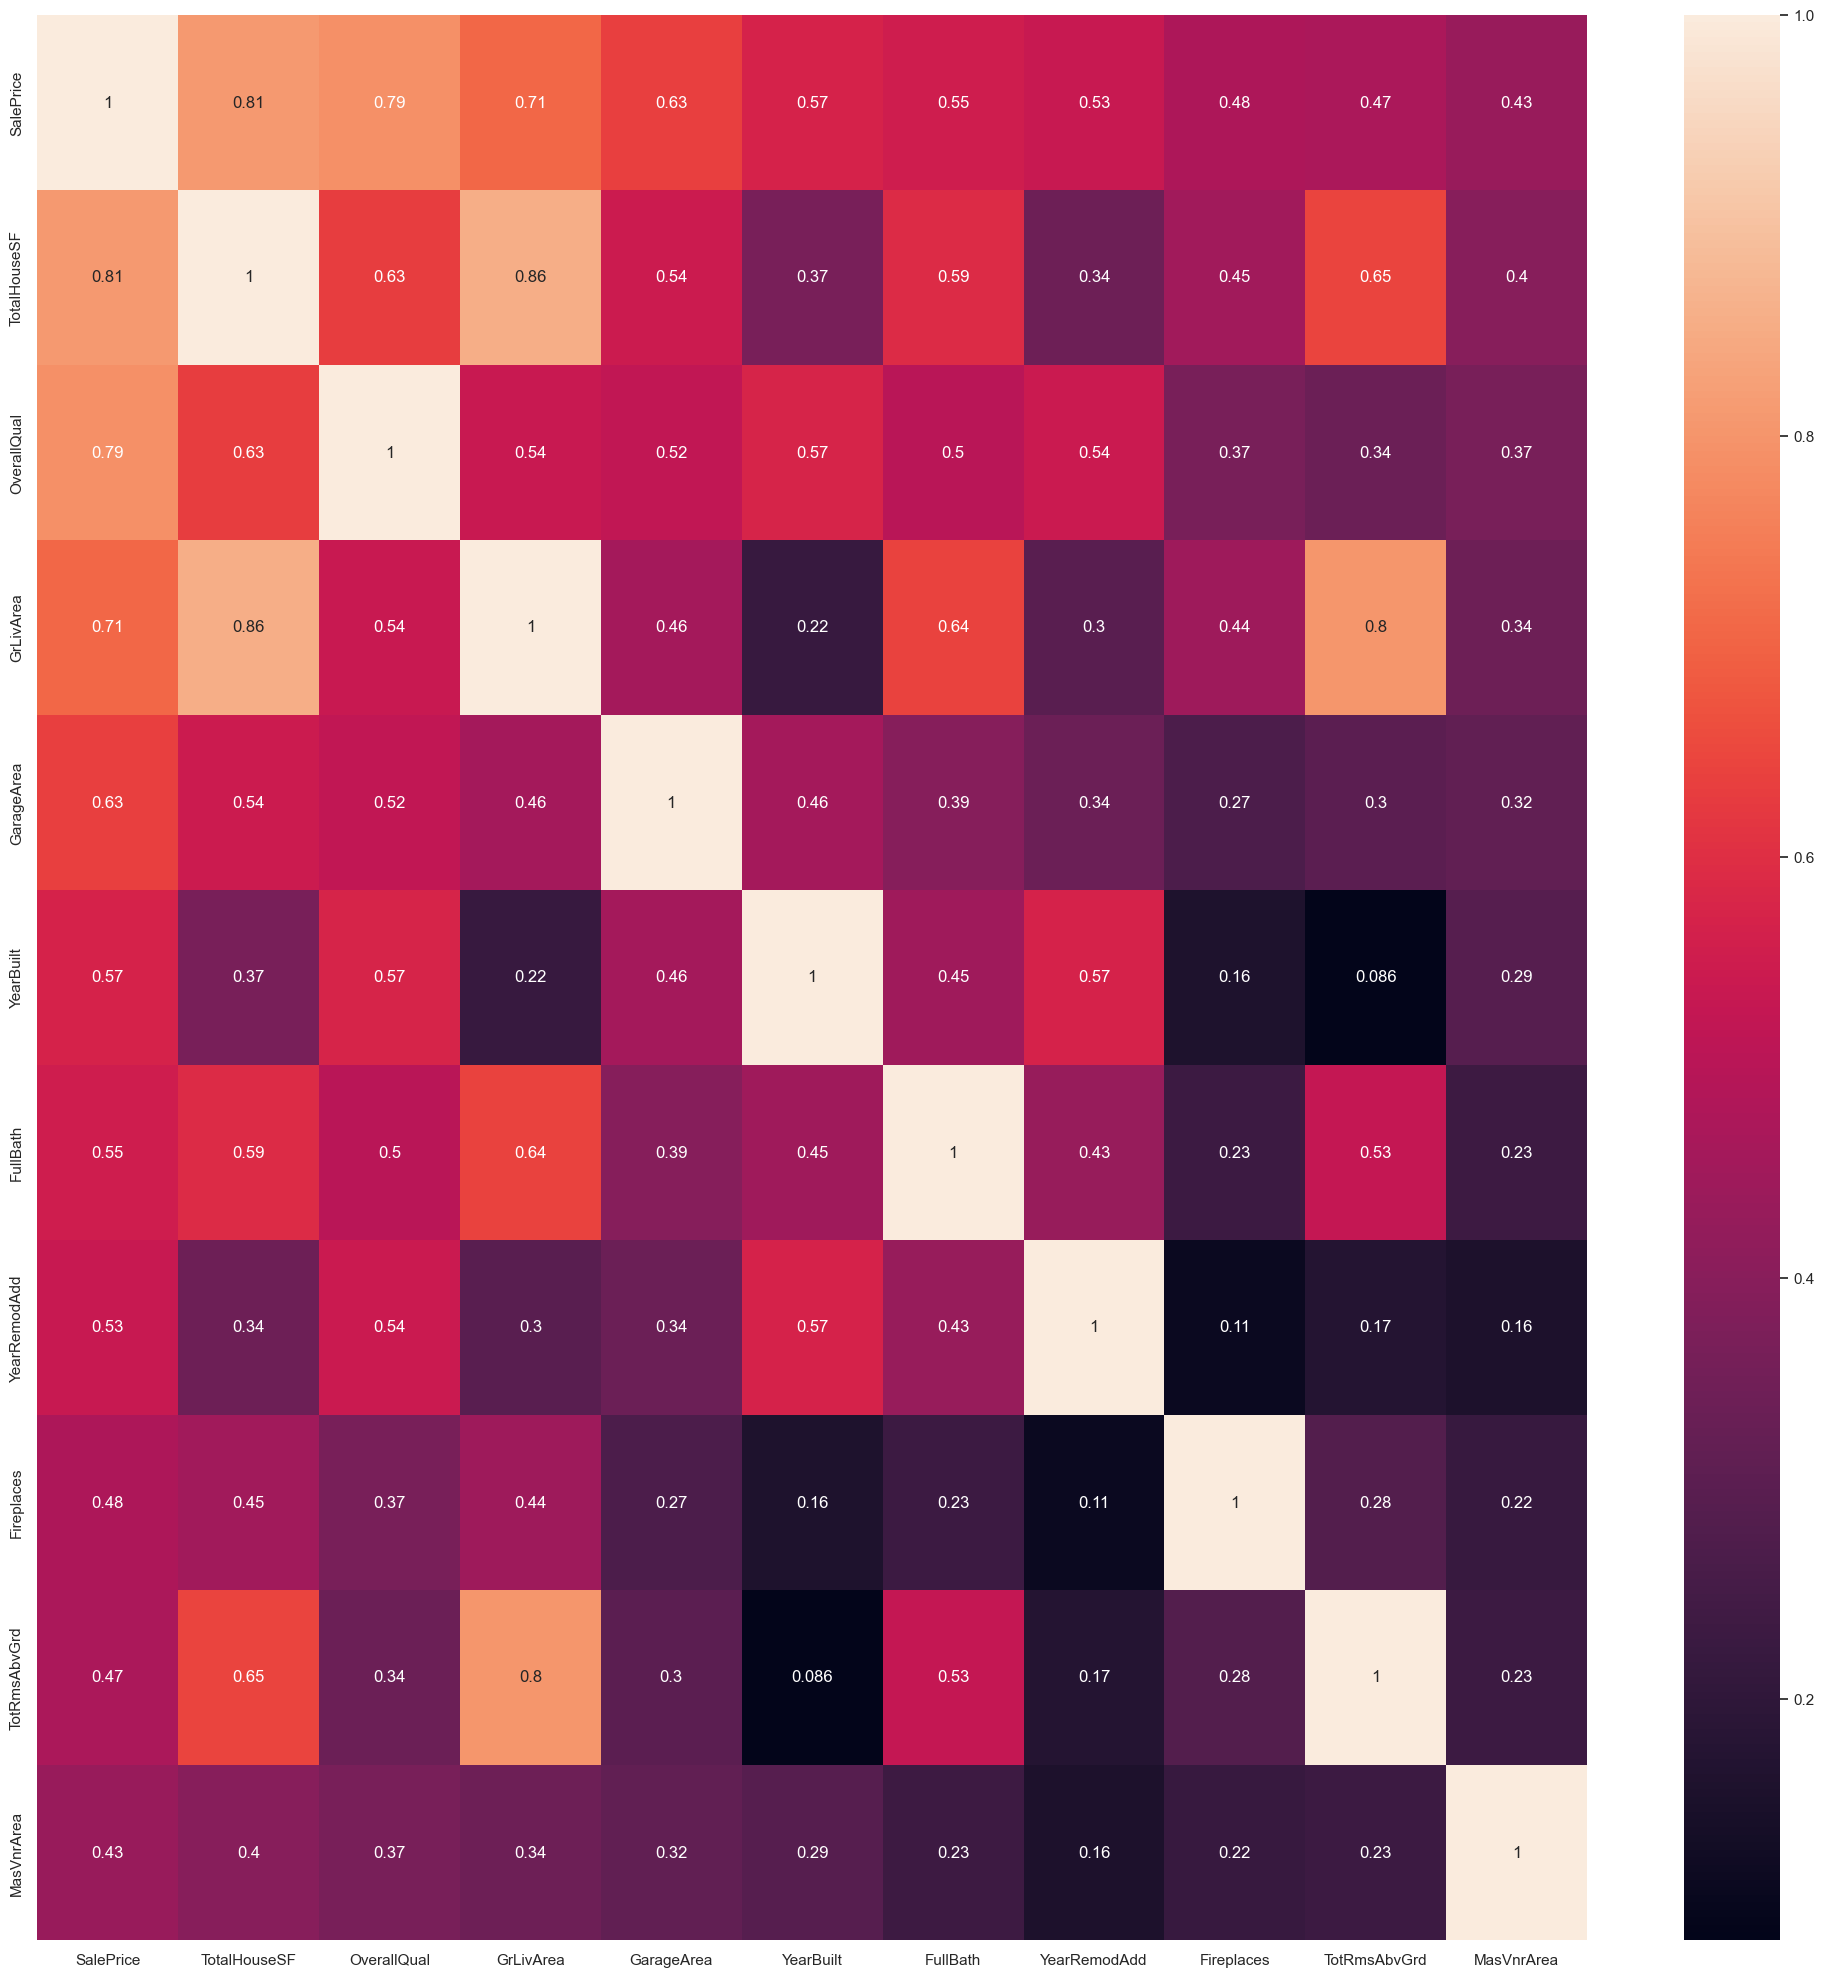

In [482]:
#start a list to keep track of what we want to keep out of our top 10
columns_to_exclude = ['GarageCars','1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']

#create those into a numerics df alongside a correlation matrix
ft_numerics = train_numerics.drop(columns=columns_to_exclude)
ft_corr = ft_numerics.corr()


heatmap = sns.heatmap(ft_numerics[ft_corr['SalePrice'].nlargest(11).index].corr(), annot=True)  
heatmap
sns.set(rc={'figure.figsize':(25,25)})

I see TotalHouseSF & GrLivArea are fairly high in correlation, 0.86 also TotRmsAbvGrd at 0.8. I will do a VIF to see if they are showing multicollinearity.

In [490]:
#performing VIF on TotalHouseSF, TotRmsAbvGrd and GrLivArea to see if there is multicollinearity. Would make sense, more SF, more rooms.

#we will select the predictor and the target variables
predictors = ["TotalHouseSF", "TotRmsAbvGrd", 'GrLivArea']
target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_Garage = pd.DataFrame()
vif_Garage['Variables'] = subset_train.columns
vif_Garage['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]

# Display the VIF DataFrame for 'ab' and 'ac'
print(vif_Garage[vif_Garage['Variables'].isin(predictors)])

print('\n')

#performing VIF on just the lower amounts to see if there is multicollinearity.

#we will select the predictor and the target variables
predictors = ["TotalHouseSF", "TotRmsAbvGrd"]
target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_Garage = pd.DataFrame()
vif_Garage['Variables'] = subset_train.columns
vif_Garage['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]

# Display the VIF DataFrame for 'ab' and 'ac'
print(vif_Garage[vif_Garage['Variables'].isin(predictors)])

      Variables       VIF
1  TotalHouseSF  5.407404
2  TotRmsAbvGrd  2.977471
3     GrLivArea  6.408744


      Variables       VIF
1  TotalHouseSF  3.920834
2  TotRmsAbvGrd  1.734975


It would seem GrLivArea has a high VIF compared to TotalHouseSF, we will keep TotRmsAbvGrd though.

Our list of columns to exclude grows. I am also removing BsmtSF areas since I missed that previously.

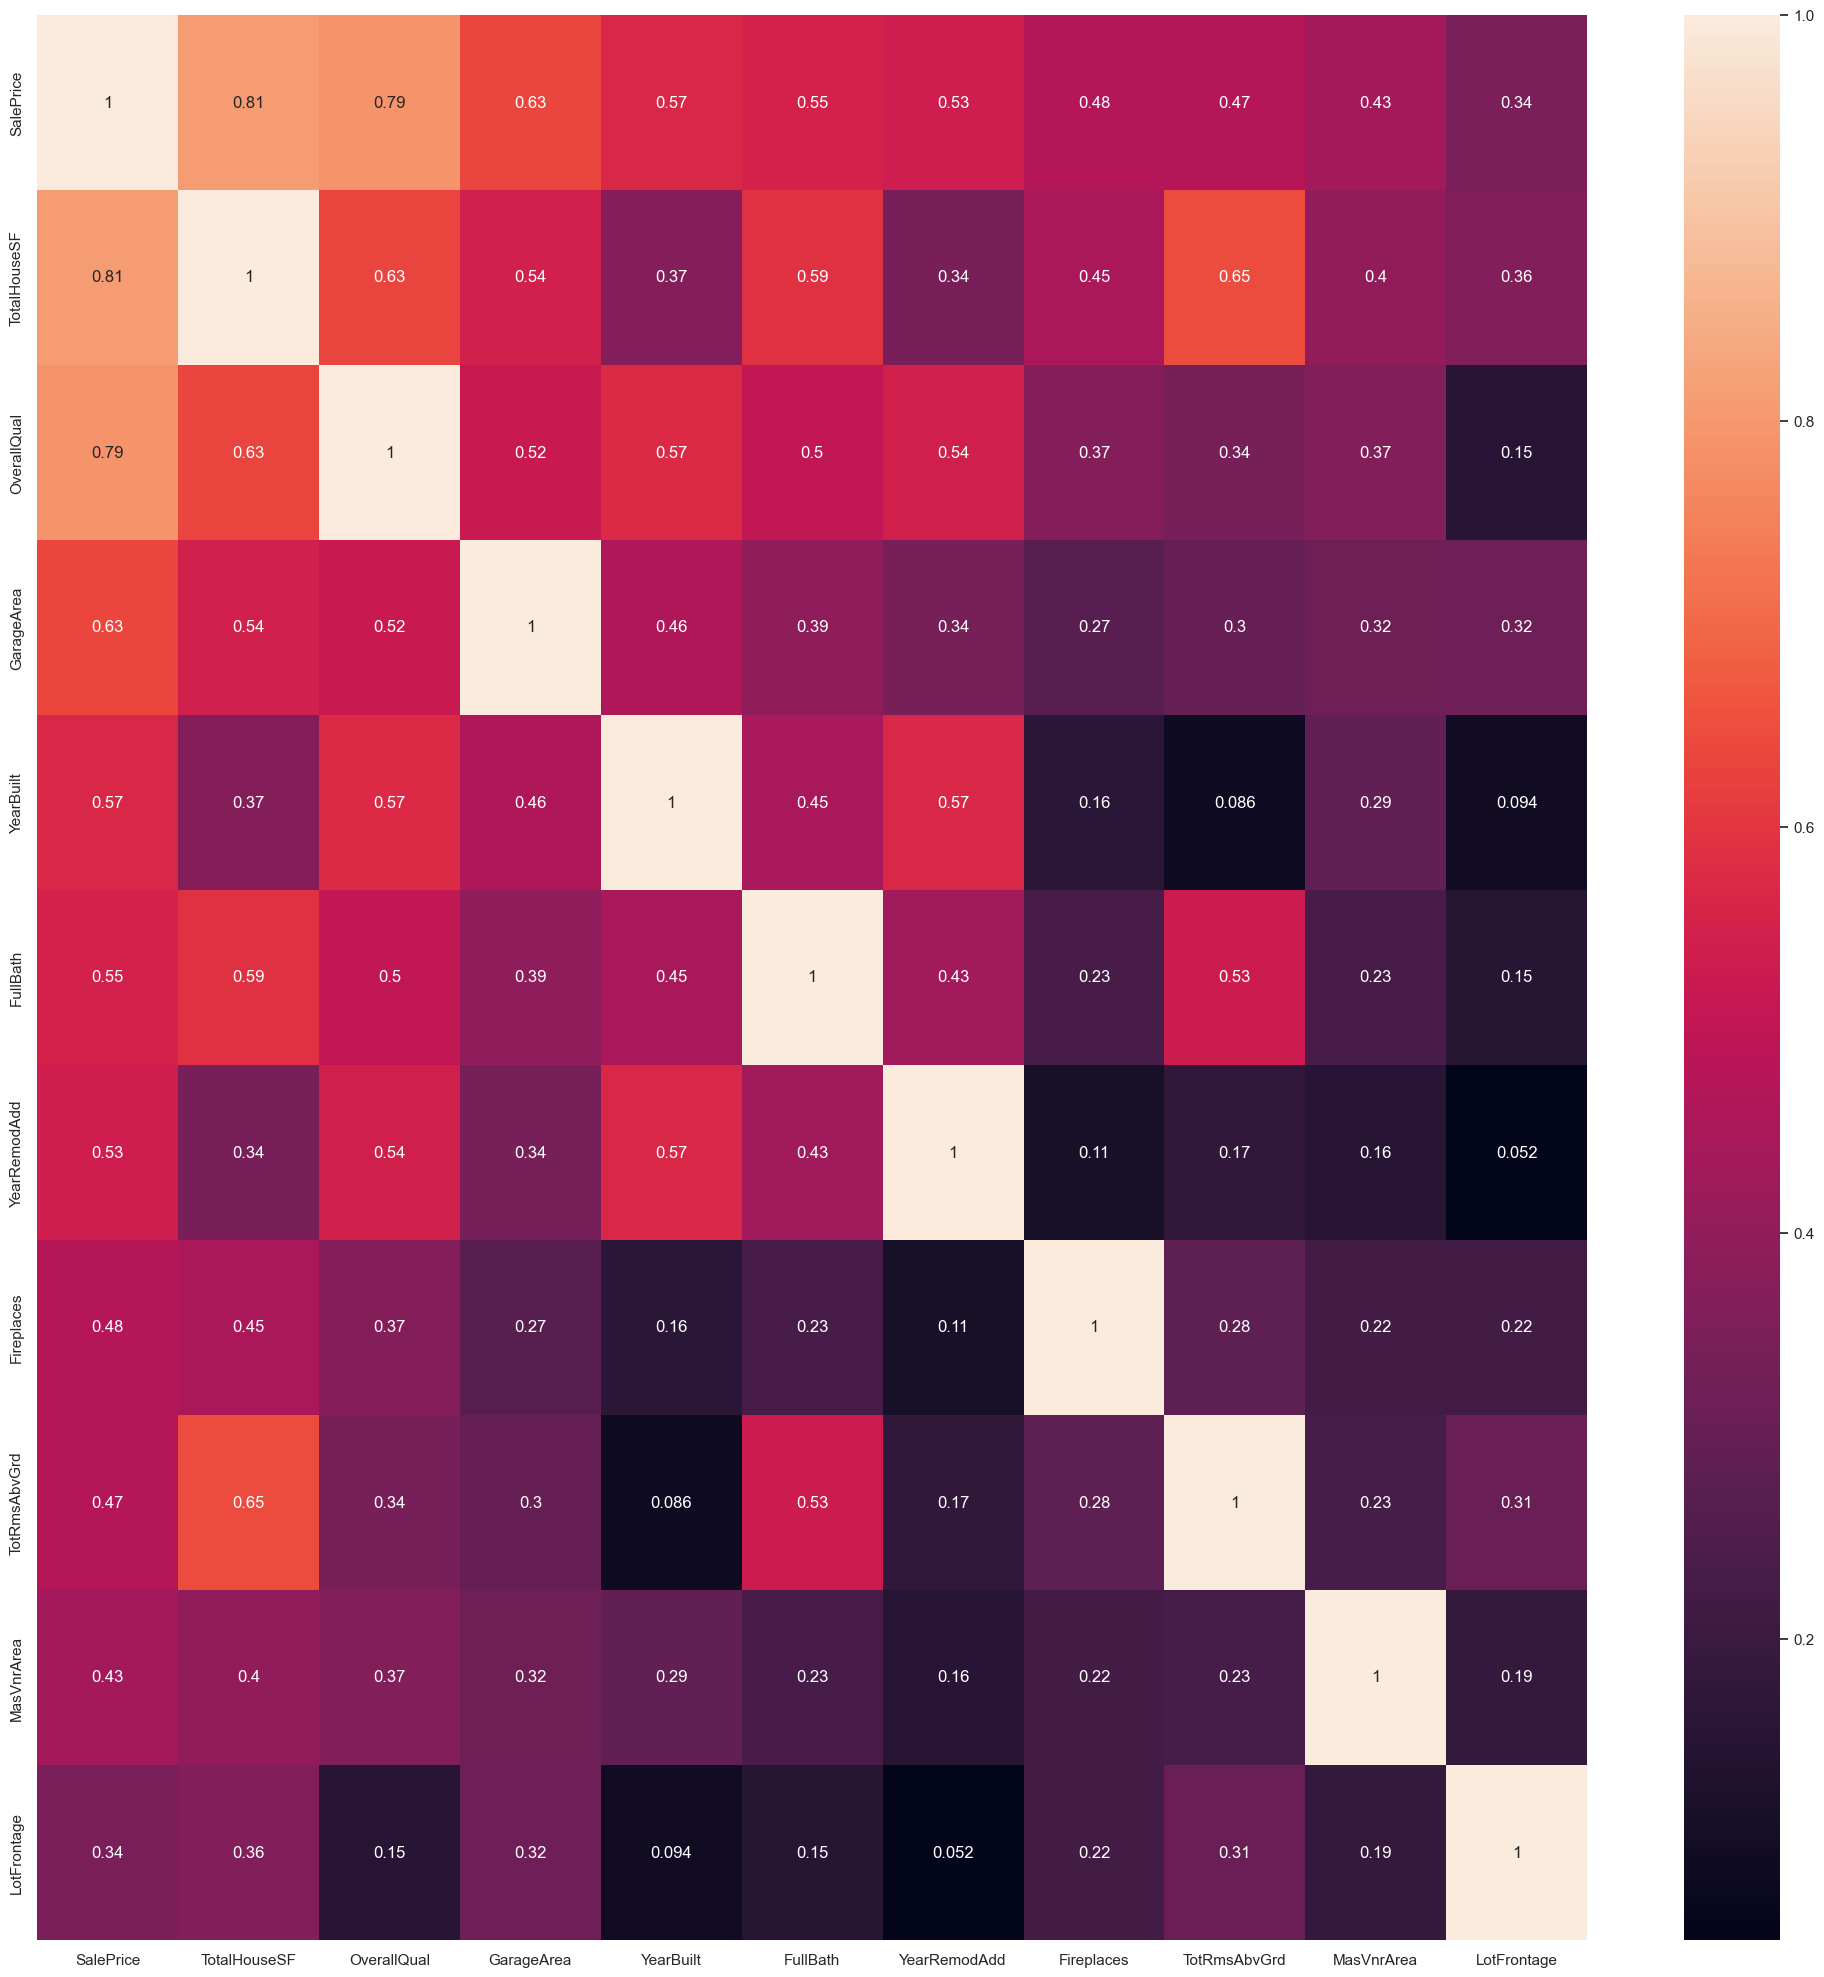

In [493]:
#start a list to keep track of what we want to keep out of our top 10
columns_to_exclude = ['GarageCars','1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

#create those into a numerics df alongside a correlation matrix
ft_numerics = train_numerics.drop(columns=columns_to_exclude)
ft_corr = ft_numerics.corr()


heatmap = sns.heatmap(ft_numerics[ft_corr['SalePrice'].nlargest(11).index].corr(), annot=True)  
heatmap
sns.set(rc={'figure.figsize':(25,25)})

# Model Building

Let's start with a simple linear regression on the basic numeric variables we got after making one feature and clearing some multicollinearity.

In [502]:
#making a separate df for model building purposes
ft_testdf = ft_numerics[ft_corr['SalePrice'].nlargest(11).index]

In [509]:
#the features will be X (independent variables)
X = ft_testdf.drop('SalePrice', axis=1)
X_array = X.values
#the target (dependent variable) will be y
y = ft_testdf['SalePrice']
y_array = y.values

# Creating a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# # Make predictions - Check Data Cleaning in Python 2 ChatGPT Log for Clarity
# X_new = np.array([[0], [2]])  # New data for prediction
# predictions = model.predict(X_new)

# # Output the coefficients

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}) # Slope of the linear regression line
intercept = pd.DataFrame({'Intercept': [model.intercept_]}) # Intercept of the linear regression line

print("Coefficients:")
print(coefficients)
print("\nIntercept:")
print(intercept)


# Predictions
#print("Predictions for new data:", predictions)

Coefficients:
        Feature   Coefficient
0  TotalHouseSF     37.402507
1   OverallQual  14941.498868
2    GarageArea     37.872611
3     YearBuilt    221.509022
4      FullBath  -3579.738297
5  YearRemodAdd    426.289491
6    Fireplaces  10908.535030
7  TotRmsAbvGrd   -187.489095
8    MasVnrArea     20.216840
9   LotFrontage    232.469753

Intercept:
      Intercept
0 -1.325560e+06


## R-Squared & Adjusted R-Squared Values

In [525]:
# Make predictions using the trained model
predictions = model.predict(X)

# R-squared
r2 = r2_score(y, predictions)
print("R-squared:", r2)

# Adjusted R-squared using statsmodels
X_with_intercept = sm.add_constant(X)  # Add intercept term
model_sm = sm.OLS(y, X_with_intercept).fit()
adjusted_r2 = model_sm.rsquared_adj
print("Adjusted R-squared:", adjusted_r2)

R-squared: 0.8405123304839047
Adjusted R-squared: 0.8398849202969807


In [290]:
#compare with alley drop and no drop, and saleprice

#simple / multple -> lasso ridge net -> experiment, tree based, xgboost gradient random forest etc..